In [107]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
from skimage.filters import gaussian,laplace,threshold_otsu
import scipy.ndimage
import skimage
import math

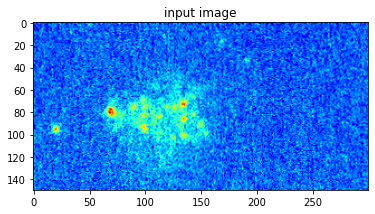

In [108]:
imfile = '/content/img_A4_P1.bmp'
#imfile = '/content/drive/MyDrive/CS206/CS206Lab4/img_A4_P1.bmp'
I = io.imread(imfile,as_gray=True)
plt.imshow(I,cmap='jet'),plt.title('input image')
plt.show()

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create a Laplacian-of-Gaussian Volume

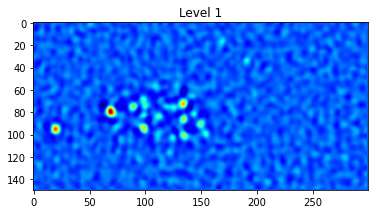

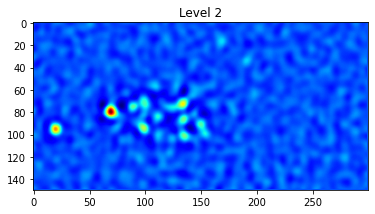

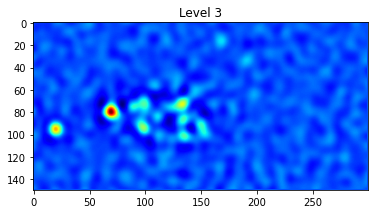

In [110]:
# Bugs

# Get the image shape
h,w = I.shape
# print(I.shape)
# Using gaussian function from skimage.filters to blur the image with parameter of the input image and sigma
img1 = filters.gaussian(I,sigma=3) 
# Using the formula given in assignment submission page to calculate the kernel size 
k1 = int(2*round(3*3)+1)
# The LoG filter can be applied using skimage.filters.gaussian followed by skimage.filters.laplace 
# Parameter: image and kernal size
# Using Laplace to find edges 
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.laplace
new_img1 = filters.laplace(img1, ksize = k1)

# Same as the img1, with sigma changing to 4
img2 = filters.gaussian(I,sigma=4)  
k2 = int(2*round(3*4)+1)
new_img2 = filters.laplace(img2, ksize = k2)

# same as the img1 with sigma changing to 5
img3 = filters.gaussian(I,sigma=5)  
k3 = int(2*round(3*5)+1)
new_img3 = filters.laplace(img3, ksize = k3)

# All 3 levels of the volume must be stored in a single Numpy array where h and w are the height and width of the input image.
# Therefore, initialize an numpy array and store 3 levels of proceesed image
Levels = np.zeros((h,w,3))
Levels[:,:,0] = new_img1
Levels[:,:,1] = new_img2
Levels[:,:,2] = new_img3


# Show images
plt.imshow(new_img1,cmap='jet')
plt.title('Level 1')
plt.show()

plt.imshow(new_img2,cmap='jet')
plt.title('Level 2')
plt.show()

plt.imshow(new_img3,cmap='jet')
plt.title('Level 3')
plt.show()



#Obtain a rough estimate of blob locations

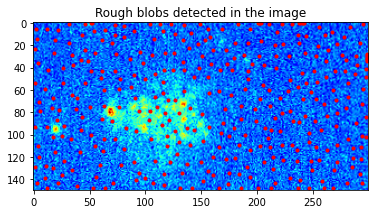

In [111]:
# Bugs
# I use minumum_filters with only volume as the parameters and get error 'No footprint'. Then i found it must have either footprint or size. 
regmin =  scipy.ndimage.filters.minimum_filter(Levels, size = 8)
# print(regmin.shape)
# Citation:
# https://stackoverflow.com/questions/27598103/what-is-the-difference-between-imregionalmax-of-matlab-and-scipy-ndimage-filte
msk = (Levels == regmin)

# Collapse this 3D binary image into a single channel image by computing the sum of corresponding pixels in the 3 channels. 
# https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html
# np.sum function is used to sum of array elements over a given axis
# Therefore, the parameters are numpy array and axis
collapse = np.sum(msk, axis = 2)
# print(collapse.shape)
# find non zero pixels within an image 
locations = np.nonzero(collapse)

plt.imshow(I,cmap='jet')
# Maker Style: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
# Using scatter to plot the specific pixels. In this case, the non zero pixels of collapse
plt.scatter(locations[1], locations[0],c = 'r', marker = '.')
plt.title('Rough blobs detected in the image')
plt.show()



# Refine the blobs using Otsu thresholding

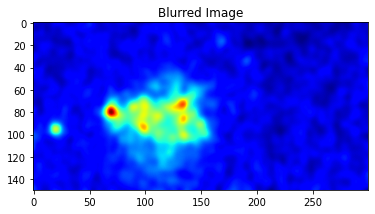

In [112]:
# Gaussian function with parameters of image and sigma to blur the image
gaussian_img = filters.gaussian(I,sigma=3)  
plt.imshow(gaussian_img, cmap = 'jet')
plt.title("Blurred Image")
plt.show()



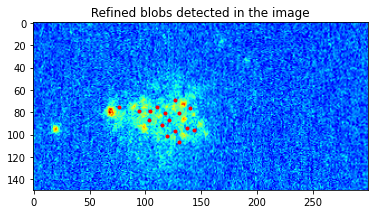

In [113]:
# Gaussian with sigma 3 is more like the result of last cell. However, the output for this part will not be very similar to the given output of this cell if keep using sigma 3
# Therefore, i tried another sigma value here
gaussian_img = filters.gaussian(I,sigma=1)  
h,w = gaussian_img.shape
# print(gaussian_img.shape)
# Convert the blurred image to 8-bit unsigned integer format using skimage.img_as_ubyte with parameter of the blurred image
img_as_ubyte(gaussian_img)
# obtain the optimal threshold for this image using threshold_ostu function from skimage.filters with parameter of blurred image
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu
threshold = filters.threshold_otsu(gaussian_img)
# print(threshold)

# Remove all minima in the output image of "Obtain a rough estimate of blob locations" where pixel values are less than the obtained threshold
# Using two for loops go through every pixel of blurred image and compare pixel value with threshold and zero out the corresponding pixels in collapse
for i in range(h):
  for j in range(w):
    if gaussian_img[i,j] < threshold:
      collapse[i,j] = 0
# Find the non zero pixels 
new_locations = np.nonzero(collapse)
plt.imshow(I,cmap='jet')
plt.scatter(new_locations[1], new_locations[0],c = 'r',marker='.')
plt.title(" Refined blobs detected in the image ")
plt.show()